# deskripsi library yang digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi Memanggil Dataser

In [4]:
df = pd.read_csv('insurance.csv')

# BUSINESS UNDERSTANDING

Proyek ini untuk memahami masalah mengenai bisnis, yaitu bagaimana meningkatkan akurasi estimasi biaya asuransi agar dapat memberikan informasi yang lebih akurat bagi pengguna asuransi dan membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# DATA UNDERSTANDING

1. age : Umur penerima asuransi
2. sex : Jenis kelamin penerima asuransi
3. bmi : indeks masa tubuh
4. children : Jumlah anak yang ditanggung oleh asuransi
5. smoker : perokok/tidak perokok
6. region : Daerah penerima asuransi
7. charges : Biaya medis individu yang ditagih oleh asuransi

# Deskripsi Dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA PREPARATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Konversi Gender
konversi_gender = {'male': 1, 'female': 2}
df['sex'] = df['sex'].map(konversi_gender)

In [11]:
# Konversi Smoker
konversi_smoker = {'yes': 1, 'no': 2}
df['smoker'] = df['smoker'].map(konversi_smoker)

In [12]:
# deteksi duplikasi data
df.duplicated().sum()

1

In [13]:
#cek duplikasi data
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,1,30.59,0,2,northwest,1639.5631
581,19,1,30.59,0,2,northwest,1639.5631


In [14]:
df = df.drop_duplicates() #menghapus duplikasi data
df.duplicated().sum() #cek duplikat

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,1.495138,0.500163,1.0000,1.000,1.0000,2.00000,2.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,1.795064,0.403806,1.0000,2.000,2.0000,2.00000,2.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


# Visualisasi Data

C:\Users\asus\AppData\Local\Temp\ipykernel_14616\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

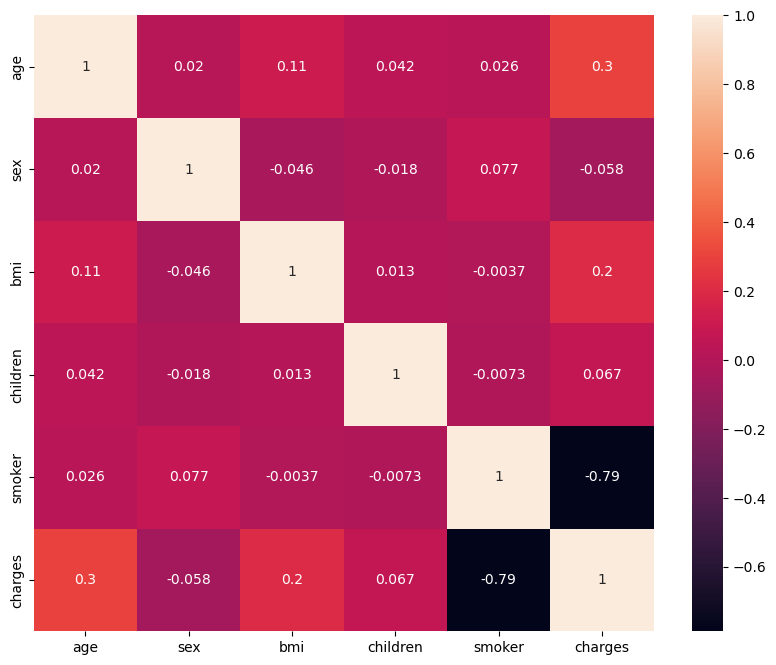

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# MODELING

# seleksi fitur

In [17]:
features = ['age','sex','bmi','children','smoker']
x = df[features]
y = df['charges']
x.shape, y.shape

((1337, 5), (1337,))

# split data training dan data testing

In [18]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(335,)

# membuat model regresi linier

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

# EVALUATION MODEL

In [20]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  75.50147797822225 %


# membuat inputan model regresi linier

In [23]:
#age,sex,bmi,children,smoker
#ans = 11090.7178
input_data = np.array([[27,1,42.13,0,1]])

prediction = lr.predict(input_data)
print('Estimasi Biaya Medis dalam US Dolar :', prediction)

Estimasi Biaya Medis dalam US Dollar : [31988.36901421]


c:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# save model

In [22]:
import pickle

filename = 'estimasi_medical.sav'
pickle.dump(lr,open(filename,'wb'))